In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load our diabetes dataset
diabetes = load_diabetes()

# Convert our dataset into a pandas dataframe
my_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target column to the dataframe
my_df['target'] = diabetes.target

# Grab the head
my_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [17]:
# Split the data into X (features) and y (target)
X = my_df.drop('target', axis=1)
y = my_df['target']
X.shape, y.shape

((442, 10), (442,))

In [18]:
# Split the data into training and testing sets
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print out the shape of the training and testing sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (353, 10) (353,)
Testing set shape: (89, 10) (89,)


In [19]:
# Create a linear regression model
lr = LinearRegression()

In [20]:
# Train the model on the training set = This is where the model learns the relationship between the features and the target
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make predictions on the testing set
# y preds are the predictions that the model makes on the testing set
# Once we have the predictions we can compare them to the actual target values
y_pred = lr.predict(X_test)
y_pred.shape

(89,)

In [22]:
# Evaluate the model performance

# R2 score : Varaiance of the dependent variable that is predictable from the independent variable
# How well the model is able to predict the target values or fits data.
# Ranges from 0 to 1. 1 means the model is able to predict the target values perfectly.
# 0 means the model is not able to predict the target values at all.
r2 = r2_score(y_test, y_pred)

# Mean Squared Error : Average squared difference between the predicted values and the actual values
# The lower the value the better the model is at predicting the target values
mse = mean_squared_error(y_test, y_pred)

# Mean Absolute Error : Average absolute difference between the predicted values and the actual values
# The lower the value the better the model is at predicting the target values  
mae = mean_absolute_error(y_test, y_pred)

# Intercept : The value of the target when all the features are zero
# This is the value of the target when all the features are zero
# If positive, the target value increases as the feature value increases (as age increases, chances of diabetes increases)
# If negative, the target value decreases as the feature value increases (as age increases, chances of diabetes decreases) "Not possible in this case"
intercept = lr.intercept_

print('R2 Score:', r2)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Intercept:', intercept)

R2 Score: 0.4526027629719196
Mean Squared Error: 2900.1936284934804
Mean Absolute Error: 42.79409467959993
Intercept: 151.34560453985995


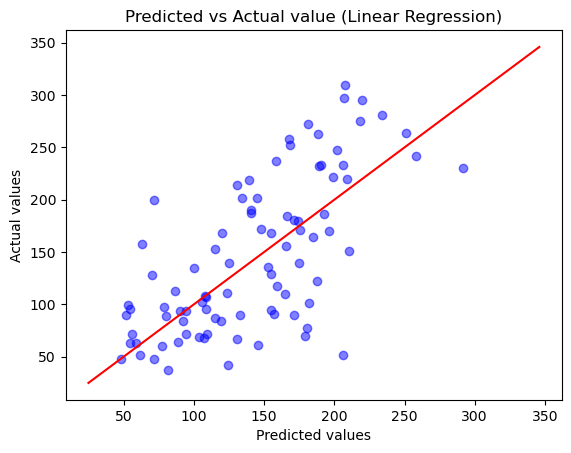

In [23]:
# plot the predictions against the actual values
# predicted values of the target variable are plotted on the x-axis
# actual values of the target variable are plotted on the y-axis
# if the model is a good fit, the points should be close to the diagonal line of x=y
# indicating a strong linear relationship between the predicted and actual values

plt.scatter(y_pred, y_test, alpha=0.5 , color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='r')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual value (Linear Regression)')
plt.show()

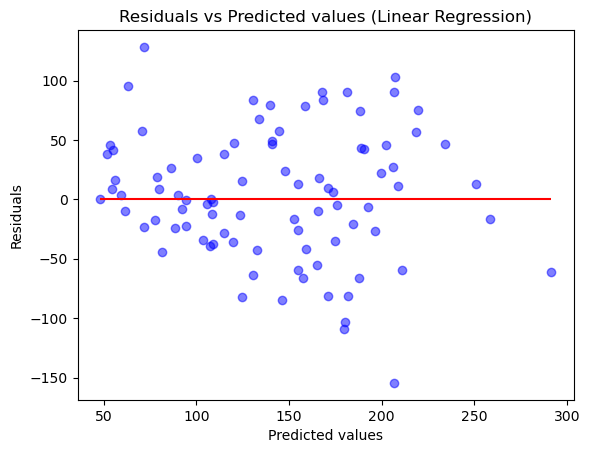

In [24]:
# Plot the residuals
# Residuals are the difference between the actual values and the predicted values
# Residuals are plotted on the y-axis
# The predicted values are plotted on the x-axis
# If the residuals are randomly scattered around the horizontal line at 0, then the model is a good fit
# If the residuals are not randomly scattered, then the model is not a good fit

plt.scatter(y_pred, y_test - y_pred, color='b', alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='r')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values (Linear Regression)')
plt.show()